### The objective of this notebook
Test the hypothesis: are there different playmaker styles of defenders (offensive attack vs defensive stopping)?
1. Revisit feature engineering.
2. Test the data against various models.
3. Stack rank the players by style in the 'Defense Special Score'. 

In [1814]:
# Dependencies
import pandas as pd
import numpy as np

from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns


In [1815]:
# Define the relative file path
file_path = Path('../data/processed/defenders_features.csv')

# Read the CSV file into a DataFrame
features_df = pd.read_csv(file_path)

features_df.columns


Index(['season_name', 'element_code', 'start_cost', 'end_cost', 'total_points',
       'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_conceded', 'id_defender',
       'first_name_defender', 'second_name_defender', 'unique_id', 'id_ref',
       'first_name_ref', 'second_name_ref', 'goals_conceded_per_90',
       'goals_scored_per_90', 'assists_per_90', 'clean_sheets_per_90',
       'defensive_effectiveness', 'expected_goals_per_90',
       'expected_assists_per_90', 'ict_index_per_90',
       'discrepancy_expected_actual_goals', 'goals_conceded_rolling_5',
       'clean_sheets_rolling_5', 'yellow_cards_rolling_5',
       'red_cards_rolling_5', 'defensive_effectiveness_rolling_5',
       'd

In [1816]:
# Groupby and Aggregating
# Group by 'second_name_defender' without losing relevant columns
aggregated_df = (
    features_df.groupby('second_name_defender').agg({
        'season_name': 'first',                      # Keep the first season name (or you can choose other approaches)
        'element_code': 'first',                     # Static player identifier
        'start_cost': 'first',                       # Static cost at the beginning of the season
        'end_cost': 'first',                         # Static cost at the end of the season
        'goals_scored': 'sum',                       # Total goals scored
        'assists': 'sum',                            # Total assists
        'minutes': 'sum',                            # Total minutes played
        'clean_sheets': 'sum',                       # Total clean sheets
        'goals_conceded': 'sum',                     # Total goals conceded
        'expected_goal_involvements': 'sum',         # Total expected goal involvements
        'goals_scored_per_90': 'mean',               # Average goals scored per 90 minutes
        'assists_per_90': 'mean',                    # Average assists per 90 minutes
        'expected_goals': 'sum',                     # Total expected goals
        'expected_assists': 'sum',                   # Total expected assists
        'expected_goals_per_90': 'mean',             # Expected goals per 90 minutes (average)
        'expected_assists_per_90': 'mean',           # Expected assists per 90 minutes (average)
        'yellow_cards': 'sum',                       # Total yellow cards
        'red_cards': 'sum',                          # Total red cards
        'total_points': 'sum',                       # Total points
        'ict_index': 'mean',                         # Average ICT index
        'influence': 'mean',                         # Average influence
        'creativity': 'mean',                        # Average creativity
        'threat': 'mean',                            # Average threat
        'bonus': 'sum',                              # Total bonus points
        'penalties_missed': 'sum',                   # Total penalties missed
        'penalties_saved': 'sum',                    # Total penalties saved
        'starts': 'sum',                             # Total starts
        'clean_sheets_per_90': 'mean',               # Average clean sheets per 90 minutes
        'defensive_effectiveness': 'mean',           # Average defensive effectiveness
        'expected_goals_conceded': 'sum',            # Total expected goals conceded
        'goals_conceded_per_90': 'mean',             # Average goals conceded per 90 minutes
        'defensive_effectiveness_trend': 'mean',     # Trend for defensive effectiveness
        'goals_conceded_trend': 'mean',              # Trend for goals conceded
        'clean_sheets_trend': 'mean',                # Trend for clean sheets
        'first_name_defender': 'first',              # Static player's first name
        'id_defender': 'first',                      # Static player identifier
        'id_ref': 'first',                           # Static reference id
        'second_name_ref': 'first',                  # Static reference second name
        'first_name_ref': 'first',                   # Static reference first name
    }).reset_index()
)


In [1817]:
# A copy for Attack Style Players (Offensive Focus)
attack_style_df = aggregated_df.copy()

# A copy for Stopping Style Players (Defensive Focus)
stopping_style_df = aggregated_df.copy()

### Defenders with an "offensive attack" style of play
1. **goals_scored and goals_scored_per_90**: Indicates the number of goals the defender scored. A higher value means the player actively contributes to offensive attacks.
2. **assists and assists_per_90**: Shows how often the defender sets up scoring opportunities for others, an essential part of an offensive play style.
3. **creativity**: This metric from the ICT index evaluates a player’s ability to create goal-scoring opportunities. A defender with a high creativity score likely participates actively in offensive plays.
4. **expected_goals** and **expected_goals_per_90**: Represents the number of goals the player is expected to score based on their positioning and chances and an indicator of offensive involvement.
5. **expected_assists** and **expected_assists_per_90**: Measures the likelihood of assists based on the player's play and positioning, which provides insight into how much of a playmaker the defender is.
6. **ict_index** and **ict_index_per_90**: A composite score for Influence, Creativity, and Threat.
7. **influence**: This metric reflects the impact a player has on the match, both defensively and offensively.
8. **threat**: This reflects how likely a player is to score based on their attacking actions.
9. **total_points**: While not explicitly offensive, this is a summary of the player's overall contributions, which can reflect both defensive and offensive success.
10. **minutes**: The amount of playing time a defender gets is an important indicator. If they are regularly on the field, it’s likely they’re involved in both offensive and defensive plays.
11. **starts**: A regular starter is more likely to contribute consistently to the team’s offensive strategies.

In [1818]:
attack_style_df.columns

Index(['second_name_defender', 'season_name', 'element_code', 'start_cost',
       'end_cost', 'goals_scored', 'assists', 'minutes', 'clean_sheets',
       'goals_conceded', 'expected_goal_involvements', 'goals_scored_per_90',
       'assists_per_90', 'expected_goals', 'expected_assists',
       'expected_goals_per_90', 'expected_assists_per_90', 'yellow_cards',
       'red_cards', 'total_points', 'ict_index', 'influence', 'creativity',
       'threat', 'bonus', 'penalties_missed', 'penalties_saved', 'starts',
       'clean_sheets_per_90', 'defensive_effectiveness',
       'expected_goals_conceded', 'goals_conceded_per_90',
       'defensive_effectiveness_trend', 'goals_conceded_trend',
       'clean_sheets_trend', 'first_name_defender', 'id_defender', 'id_ref',
       'second_name_ref', 'first_name_ref'],
      dtype='object')

### Offensive Attack Style Feature Engineering


1. Attack Contribution Ratio (ACR) and Expected Attack Contribution (EAC) directly measure offensive productivity and expectations.
2. Offensive Impact Index (OII), Offensive Aggressiveness Index (OAI), and Assist Efficiency weigh contributions based on different offensive aspects.
3. Minutes per Offensive Action (MOA) and Defensive Contribution Balance (DCB) balance offensive and defensive aspects, highlighting player efficiency.
4.  Defensive Player - Offensive Attack Style Incredible Score (OASIS) aggregates multiple offensive features into one measure, to rank and compare players.

In [1819]:
# ACR: Attack Contribution Ratio
#
# Measures the ratio of offensive contributions (goals, assists) to total minutes 
# played, giving a per-minute contribution to the offense.
# 
# Highlights defenders who contribute regularly to offense, even when they might 
# not have the highest absolute numbers.
#
attack_style_df['ACR'] = (attack_style_df['goals_scored'] + attack_style_df['assists']) / attack_style_df['minutes']


In [1820]:
# EAC: Expected Attack Contribution
#
# Combines expected_goals_per_90 and expected_assists_per_90 to create 
# a composite score indicating the likelihood of offensive involvement 
# per 90 minutes.
#
attack_style_df['EAC'] = attack_style_df['expected_goals_per_90'] + attack_style_df['expected_assists_per_90']


In [1821]:
# OII: Offensive Impact Index
#
# A weighted index of offensive metrics.
#
attack_style_df['OII'] = (
    0.4 * attack_style_df['goals_scored_per_90'] + 
    0.3 * attack_style_df['assists_per_90'] + 
    0.2 * attack_style_df['creativity'] + 
    0.1 * attack_style_df['threat']
)


In [1822]:
# OE: Offensive Efficiency
# 
# Measures the efficiency of a defender’s offensive actions, relative to time 
# played and chances created 
#
attack_style_df['OE'] = (attack_style_df['goals_scored'] + attack_style_df['assists']) / (attack_style_df['creativity'] * attack_style_df['minutes'])


In [1823]:
# OAI: Offensive Aggressiveness Index
#
# Distinguishes defenders who are proactively engaging in play from those who 
# are more passive
#
attack_style_df['OAI'] = (
    0.5 * attack_style_df['threat'] + 
    0.3 * attack_style_df['influence'] + 
    0.2 * attack_style_df['ict_index']
)


In [1824]:
# MOA: Minutes per Offensive Action
#
# Measures how often a defender is involved in offensive actions relative 
# to their time on the pitch.
#

attack_style_df['MOA'] = attack_style_df['minutes'] / (
    attack_style_df['goals_scored'] + attack_style_df['assists'] + attack_style_df['expected_goal_involvements']
)


In [1825]:
# Assist Efficiency
# 
# Measures how many assists a player provides relative to their total time 
# on the pitch and expected assists.
#
attack_style_df['Assist Efficiency'] = attack_style_df['assists'] / (attack_style_df['expected_assists'] * attack_style_df['minutes'])


In [1826]:
# Combining variables to capture interactions between metrics
#
attack_style_df['OII_Assist_Interaction'] = attack_style_df['OII'] * attack_style_df['Assist Efficiency']


In [1827]:
# DCB: Defensive Contribution Balance
#
# Measures how much a player balances offensive and defensive contributions.
# Defenders who can balance both offensive and defensive actions would have an 
# equal balance between clean sheets and goal involvements.
#
attack_style_df['DCB'] = attack_style_df['clean_sheets_per_90'] / (attack_style_df['goals_scored_per_90'] + attack_style_df['assists_per_90'])


In [1828]:
# OASIS: Defensive Player - Offensive Attack Style Incredible Score
# 
# A composite metric of the defensive player's offensive attack style
#
attack_style_df['OASIS'] = (
    0.4 * attack_style_df['OII'] +  # Offensive Impact Index
    0.3 * attack_style_df['ACR'] +  # Attack Contribution Ratio
    0.2 * attack_style_df['OAI'] +  # Offensive Aggressiveness Index
    0.1 * attack_style_df['Assist Efficiency'] # Assist Efficiency
)


In [1829]:
attack_style_df.head()

,second_name_defender,season_name,element_code,start_cost,end_cost,goals_scored,assists,minutes,clean_sheets,goals_conceded,...,ACR,EAC,OII,OE,OAI,MOA,Assist Efficiency,OII_Assist_Interaction,DCB,OASIS
0,Aarons,2019,232980,45,42,0,5,7352,11,175,...,0.000680,0.022628,69.445774,0.000002,217.206667,1239.797639,0.000764,0.053066,2.145380,71.219923
1,Adarabioyo,2020,109646,45,45,3,1,6653,18,105,...,0.000601,0.037407,30.090324,0.000009,261.360000,1059.394904,0.000190,0.005725,3.988193,64.308329
2,Aguerd,2022,210494,50,48,3,0,3451,7,72,...,0.000869,0.112582,25.782278,0.000014,208.470000,476.657459,0.000000,0.000000,2.349849,52.007172
3,Aina,2016,159506,50,45,3,2,4380,10,75,...,0.001142,0.023964,35.784813,0.000008,124.666667,689.763780,0.000452,0.016178,1.812656,39.247646
4,Ajer,2021,191866,45,44,3,4,4584,17,79,...,0.001527,0.070365,35.537621,0.000015,172.680000,414.466546,0.000312,0.011075,3.286975,48.751538


### Data Cleaning

In [1830]:
attack_style_df.columns

Index(['second_name_defender', 'season_name', 'element_code', 'start_cost',
       'end_cost', 'goals_scored', 'assists', 'minutes', 'clean_sheets',
       'goals_conceded', 'expected_goal_involvements', 'goals_scored_per_90',
       'assists_per_90', 'expected_goals', 'expected_assists',
       'expected_goals_per_90', 'expected_assists_per_90', 'yellow_cards',
       'red_cards', 'total_points', 'ict_index', 'influence', 'creativity',
       'threat', 'bonus', 'penalties_missed', 'penalties_saved', 'starts',
       'clean_sheets_per_90', 'defensive_effectiveness',
       'expected_goals_conceded', 'goals_conceded_per_90',
       'defensive_effectiveness_trend', 'goals_conceded_trend',
       'clean_sheets_trend', 'first_name_defender', 'id_defender', 'id_ref',
       'second_name_ref', 'first_name_ref', 'ACR', 'EAC', 'OII', 'OE', 'OAI',
       'MOA', 'Assist Efficiency', 'OII_Assist_Interaction', 'DCB', 'OASIS'],
      dtype='object')

In [1831]:
# Check for columns with NaN values and count them
nan_summary = attack_style_df.isna().sum()

# Filter to show only columns with NaN values
columns_with_nan = nan_summary[nan_summary > 0]

# Display the columns that contain NaN values and the count of NaNs in each column
print(columns_with_nan)


defensive_effectiveness_trend    35
goals_conceded_trend             35
clean_sheets_trend               35
OE                                2
Assist Efficiency                 9
OII_Assist_Interaction            9
DCB                              13
OASIS                             9
dtype: int64


In [1832]:
# Columns where forward/backward fill is appropriate
trend_columns = [
    'clean_sheets_per_90', 
    'ACR', 
    'OAI', 
    'OII', 
    'OASIS'
]

# Apply forward and backward fill for the identified columns
for column in trend_columns:
    if column in attack_style_df.columns:
        # Forward fill NaN values
        attack_style_df[column].fillna(method='ffill', inplace=True)
        # Backward fill any remaining NaN values
        attack_style_df[column].fillna(method='bfill', inplace=True)
    else:
        print(f"Column '{column}' not found in the DataFrame")


/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_988/1697307929.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  attack_style_df[column].fillna(method='ffill', inplace=True)
/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_988/1697307929.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  attack_style_df[column].fillna(method='ffill', inplace=True)
/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_988/1697

In [1833]:
# OE (Offensive Efficiency) measures the efficiency of offensive actions. 
# It’s derived from goals_scored, assists, creativity, and minutes.
# Because accuracy is important I will not artifically make-up numbers and so
# these rows will be dropped.
# 
# Drop rows where OE is missing
#attack_style_df.dropna(subset=['OE'], inplace=True)
#
# Fill missing Offensive Efficiency values with 0
attack_style_df['OE'].fillna(0, inplace=True)


/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_988/1974944784.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  attack_style_df['OE'].fillna(0, inplace=True)


In [1834]:
# Assist Efficiency could be missing because some players have no assists 
# or expected assists.  If that's true, then filling with 0 makes sense.
# 
# Fill missing Assist Efficiency values with 0
attack_style_df['Assist Efficiency'].fillna(0, inplace=True)


/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_988/1456960539.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  attack_style_df['Assist Efficiency'].fillna(0, inplace=True)


In [1835]:
# For OII_Assist_Interaction, filling it with 0 makes sense since there is 
# no assists or offensive impact for those players.
#
# Fill missing OII_Assist_Interaction values with 0
attack_style_df['OII_Assist_Interaction'].fillna(0, inplace=True)


/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_988/373692417.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  attack_style_df['OII_Assist_Interaction'].fillna(0, inplace=True)


In [1836]:
# Defensive Contribution Balance (DCB) measures how a player balances offensive 
# and defensive contributions. Missing values could be due to players who don’t 
# contribute much to offense or defense. Because of that, will impute with 0.
#
# Fill missing DCB values with 0
attack_style_df['DCB'].fillna(0, inplace=True)


/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_988/1419222711.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  attack_style_df['DCB'].fillna(0, inplace=True)


In [1837]:
# Offensive Attack Style Incredible Score (OASIS) is a composite metric and so 
# will fill with 0.
# 
# Fill missing OASIS values with 0
attack_style_df['OASIS'].fillna(0, inplace=True)


/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_988/2072602505.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  attack_style_df['OASIS'].fillna(0, inplace=True)


In [1838]:
# Check for columns with NaN values and count them
nan_summary = attack_style_df.isna().sum()

# Filter to show only columns with NaN values
columns_with_nan = nan_summary[nan_summary > 0]

# Display the columns that contain NaN values and the count of NaNs in each column
print(columns_with_nan)


defensive_effectiveness_trend    35
goals_conceded_trend             35
clean_sheets_trend               35
dtype: int64


In [1839]:
# Fix the Inf Values

# Select only numeric columns from the dataframe
numeric_cols = attack_style_df.select_dtypes(include=[np.number])

# Identify columns with 'inf' or '-inf' values
inf_cols = numeric_cols.columns.to_series()[np.isinf(numeric_cols).any()]

# Get the count of 'inf' and '-inf' values for each column
inf_counts = numeric_cols.apply(lambda x: np.isinf(x).sum())

# Filter the columns that contain 'inf' values
inf_counts = inf_counts[inf_counts > 0]

# Display columns that contain 'inf' values and their counts
print(f"Columns containing 'inf' values and their counts: \n{inf_counts}")

Columns containing 'inf' values and their counts: 
MOA                       7
Assist Efficiency         2
OII_Assist_Interaction    2
DCB                       9
OASIS                     2
dtype: int64


In [1840]:
# OE (Offensive Efficiency) is based on the ratio of offensive contributions 
# to the player's creativity and minutes. inf values occur when a player has 
# zero creativity or minutes.
# 
# I will remove the rows containing inf values, as they may not provide 
# meaningful contributions to the analysis.

# Remove rows where the player had 0 minutes
attack_style_df = attack_style_df[attack_style_df['minutes'] > 0]

# Replace 'inf' and '-inf' values in 'OE' with 0
attack_style_df['OE'].replace([np.inf, -np.inf], 0, inplace=True)

# Check if there are any remaining 'inf' values in 'OE'
#print(f"Remaining 'inf' values in 'OE': {np.isinf(attack_style_df['OE']).sum()}")



/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_988/2176458944.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  attack_style_df['OE'].replace([np.inf, -np.inf], 0, inplace=True)


In [1841]:
# MOA (Minutes per Offensive Action) has inf values when the player has 
# no offensive actions (goals, assists, or expected contributions).
#
# I will replace inf with 0 to treat players with no offensive contributions 
# as being less involved offensively.
#
# Replace 'inf' and '-inf' values with 0
attack_style_df['MOA'].replace([np.inf, -np.inf], 0, inplace=True)

# Check if there are any remaining 'inf' values in 'MOA'
#print(f"Remaining 'inf' values in 'MOA': {np.isinf(attack_style_df['MOA']).sum()}")



/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_988/3607911081.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  attack_style_df['MOA'].replace([np.inf, -np.inf], 0, inplace=True)


In [1842]:
# For Assist Efficiency, inf values arise when the expected assists or 
# minutes are zero, meaning that the player either played very little or 
# did not contribute assists.
#
# Will replace inf with 0, indicating no efficiency in assisting.
#
# Replace 'inf' and '-inf' values with 0
attack_style_df['Assist Efficiency'].replace([np.inf, -np.inf], 0, inplace=True)

# Check if there are any remaining 'inf' values in 'Assist Efficiency'
#print(f"Remaining 'inf' values in 'Assist Efficiency': {np.isinf(attack_style_df['Assist Efficiency']).sum()}")


/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_988/483216922.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  attack_style_df['Assist Efficiency'].replace([np.inf, -np.inf], 0, inplace=True)


In [1843]:
# For OII_Assist_Interaction, inf values likely indicate no contribution 
# and so will replace with 0.

# Replace 'inf' and '-inf' values with 0
attack_style_df['OII_Assist_Interaction'].replace([np.inf, -np.inf], 0, inplace=True)

# Check if there are any remaining 'inf' values in 'OII_Assist_Interaction'
#print(f"Remaining 'inf' values in 'OII_Assist_Interaction': {np.isinf(attack_style_df['OII_Assist_Interaction']).sum()}")


/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_988/1876681611.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  attack_style_df['OII_Assist_Interaction'].replace([np.inf, -np.inf], 0, inplace=True)


In [1844]:
# DCB (Defensive Contribution Balance) measures the balance between 
# defensive and offensive contributions. inf occurs when the denominator 
# is zero (i.e., no offensive contributions).
# 
# Because we are trying to identify defensive players with an offensive style,
# I will remove rows with these values.
#
# Remove rows that contain inf or -inf values
attack_style_df = attack_style_df[~np.isinf(attack_style_df['DCB'])]

# Verify that there are no remaining 'inf' values in 'DCB'
#print(f"Remaining 'inf' values in 'DCB': {np.isinf(attack_style_df['DCB']).sum()}")


In [1845]:
# For OASIS (Offensive Attack Style Incredible Score), need to recalculate 
# after cleaning the contributing metrics.

attack_style_df['OASIS'] = (
    0.4 * attack_style_df['OII'] +    # Offensive Impact Index
    0.3 * attack_style_df['ACR'] +    # Attack Contribution Ratio
    0.2 * attack_style_df['OAI'] +    # Offensive Aggressiveness Index
    0.1 * attack_style_df['Assist Efficiency']  # Assist Efficiency
)


In [1846]:
attack_style_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 0 to 166
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   second_name_defender           158 non-null    object 
 1   season_name                    158 non-null    int64  
 2   element_code                   158 non-null    int64  
 3   start_cost                     158 non-null    int64  
 4   end_cost                       158 non-null    int64  
 5   goals_scored                   158 non-null    int64  
 6   assists                        158 non-null    int64  
 7   minutes                        158 non-null    int64  
 8   clean_sheets                   158 non-null    int64  
 9   goals_conceded                 158 non-null    int64  
 10  expected_goal_involvements     158 non-null    float64
 11  goals_scored_per_90            158 non-null    float64
 12  assists_per_90                 158 non-null    float64


Features that have high correlations: set()
-----


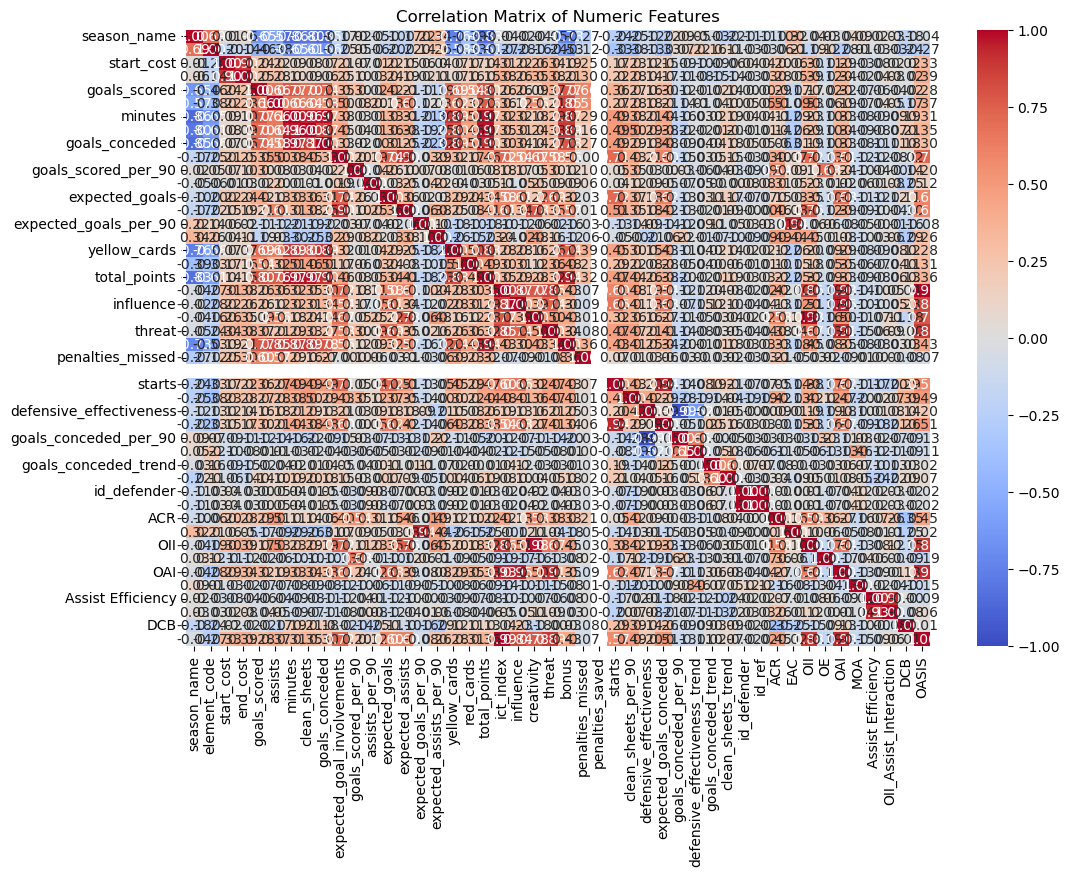

In [1847]:
# Drop object data types (non-numeric columns)
numeric_df = attack_style_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set a threshold for high correlation (absolute correlation above 0.9)
correlation_threshold = 0.9

# Create a list of features to drop based on high correlation
# Iterate over the correlation matrix and find pairs of highly correlated features
drop_list_attackers = set()  # To store features we want to drop
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            drop_list.add(colname)

# Display the drop list
print(f"Features that have high correlations: {drop_list_attackers}")
print("-----")

#Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

### Correlation Analysis
Remove One Feature from Each Pair of Highly Correlated Features for ML:
1. OII, OAI, and ACR are all related to offensive metrics and since OASIS combines these, I could drop individual ones (like OII, OAI, and ACR) and keep OASIS.
2. expected_goal_involvements and expected_goals_conceded are both expected values for goals, so for an offensive playmaker analysis, expected_goal_involvements seems more relevant than expected_goals_conceded.
3. clean_sheets and defensive_effectiveness both provide insights on defense, but might will choose clean_sheets as it's more reliable for now. (NOTE: Revisit Wookbook 4 Features)
4. OE (Offensive Efficiency) is a derived metric and since it's correlated with the underlying offensive metrics, will likly drop.
5. id_ref and end_cost are both unnecessary for modeling.

#### Drop List for ML
* OII (covered by OASIS)
* OAI (covered by OASIS)
* ACR (covered by OASIS)
* expected_goals_conceded (keep expected_goal_involvements)
* defensive_effectiveness (keep clean_sheets) -- double check 04 metrics
* id_ref
* end_cost

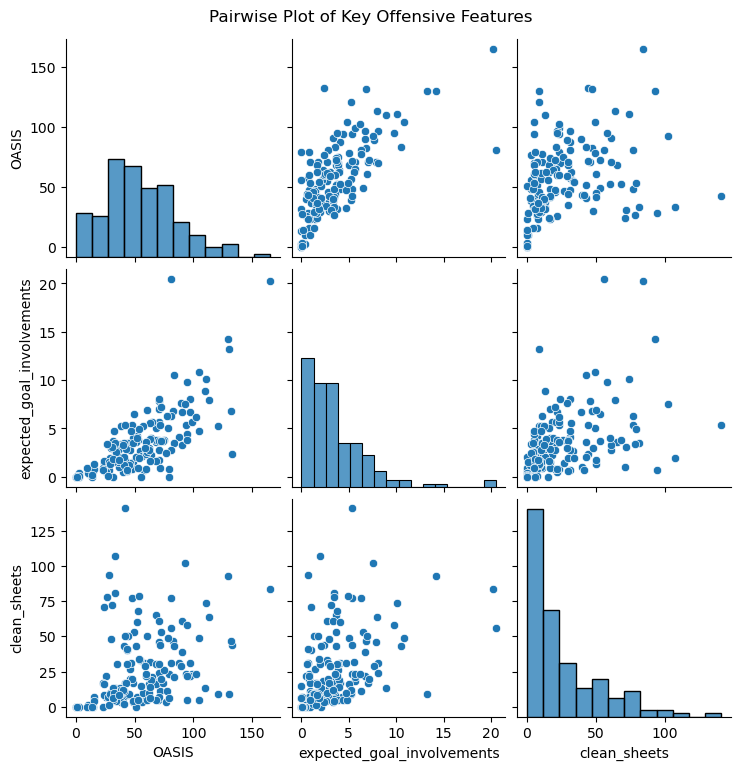

In [1848]:
# Pairwise Plot of Key Offensive Features
selected_features = ['OASIS', 'expected_goal_involvements', 'clean_sheets']
sns.pairplot(attack_style_df[selected_features])
plt.suptitle('Pairwise Plot of Key Offensive Features', y=1.02)
plt.show()

### Observations
* As OASIS increases, expected_goal_involvements also tend to rise, which 
suggests that OASIS is effectively capturing offensive playmaking behavior.
* There is a moderate spread, but no strong correlation between OASIS and 
clean_sheets, which suggests that defensive actions (like keeping clean sheets) 
and offensive capabilities (captured by OASIS) are largely independent (same with expected_goal_involvements and clean_sheets).
* There seems to be a clear separation between offensive and defensive roles, 
with only a few defenders excelling at both ends.

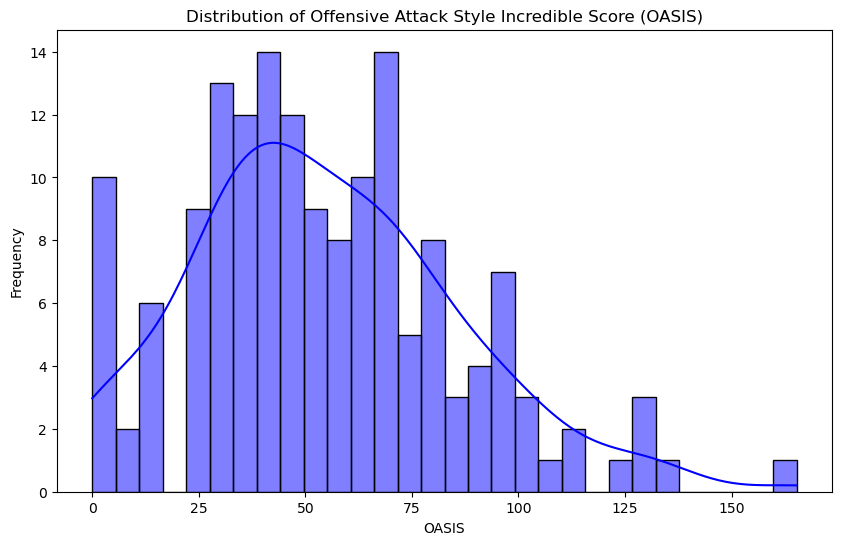

In [1849]:
# Distribution Plot of OASIS Scores
plt.figure(figsize=(10, 6))
sns.histplot(attack_style_df['OASIS'], kde=True, color='blue', bins=30)
plt.title('Distribution of Offensive Attack Style Incredible Score (OASIS)')
plt.xlabel('OASIS')
plt.ylabel('Frequency')
plt.show()


#### Observations
* Right-Skewed distribution suggests that most defenders have a minimal offensive impact
* The small number of defenders with OASIS scores above 200 suggests a rare breed of defenders who are extraordinarily involved in offensive play.

In [1850]:
top_10_clean_sheets = attack_style_df.nlargest(10, 'clean_sheets')
print(f"Number of players in top_10_clean_sheets: {len(top_10_clean_sheets)}")


Number of players in top_10_clean_sheets: 10


In [1851]:
print(top_10_clean_sheets[['second_name_defender', 'clean_sheets']])


    second_name_defender  clean_sheets
150               Walker           141
33               Coleman           107
164             van Dijk           102
50                 Evans            94
116            Robertson            93
7       Alexander-Arnold            84
132               Stones            81
127                 Shaw            79
158                Young            78
40                Davies            77


/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_988/929218322.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


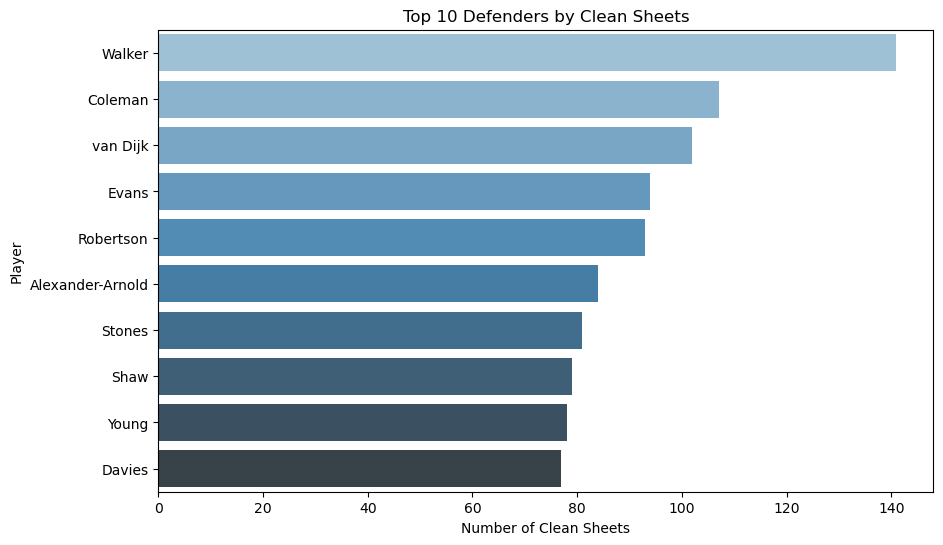

In [1852]:
# Bar Plot: Top Players by Clean Sheets

# Group by player name and sum their clean sheets to get unique entries
top_10_clean_sheets = (
    attack_style_df.groupby('second_name_defender')['clean_sheets']
    .sum()
    .reset_index()
    .nlargest(10, 'clean_sheets')
)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_clean_sheets, 
    x='clean_sheets', 
    y='second_name_defender', 
    palette='Blues_d'
)
plt.title('Top 10 Defenders by Clean Sheets')
plt.xlabel('Number of Clean Sheets')
plt.ylabel('Player')
plt.show()


#### Observations
* These players may rank lower on OASIS dimentions, but higher on defensive stopping style metrics.

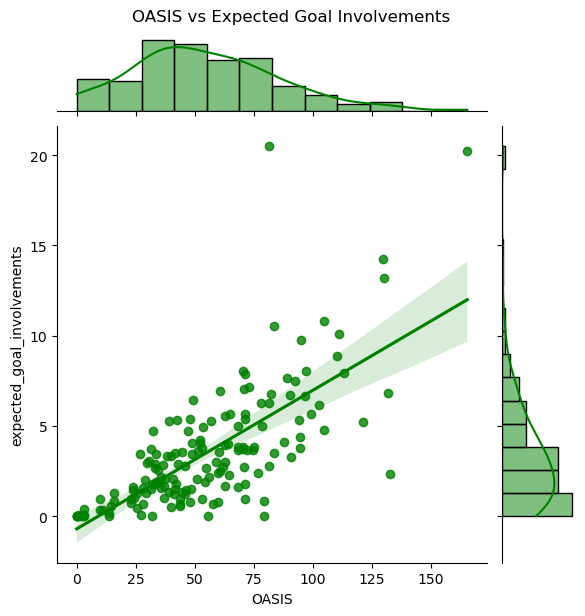

In [1853]:
# Joint Plot: OASIS vs Expected Goal Involvements
sns.jointplot(
    data=attack_style_df, 
    x='OASIS', 
    y='expected_goal_involvements', 
    kind='reg', 
    color='g'
)
plt.suptitle('OASIS vs Expected Goal Involvements', y=1.02)
plt.show()


#### Observations
* Each dot represents a player’s OASIS score and how many expected_goal_involvements they have.
The diagonal line running through the scatter plot is a regression line, indicating the trend or relationship between the two variables. The shaded area around the line represents the confidence interval, giving a sense of the uncertainty around the trend.
  * The top histogram shows the distribution of OASIS values across players.
  * The right histogram shows the distribution of expected_goal_involvements.
  * The smooth curves overlaying the histograms represent Kernel Density Estimates (KDEs), which help visualize the probability distribution of the data.
* It seems that Players with higher OASIS scores generally tend to have higher expected goal involvements, confirming that OASIS is a good indicator of offensive contribution.



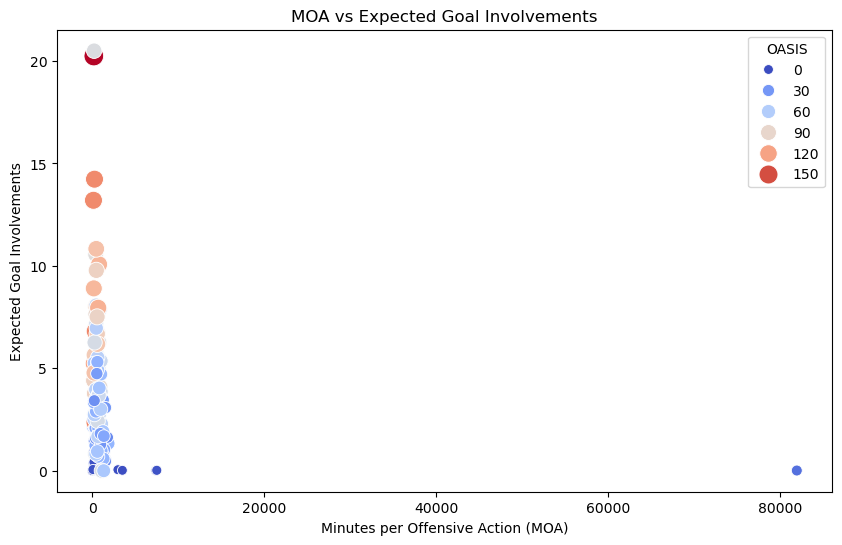

In [1854]:
# Scatter Plot: MOA vs Expected Goal Involvements
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=attack_style_df, 
    x='MOA', 
    y='expected_goal_involvements', 
    hue='OASIS', 
    size='OASIS', 
    sizes=(50, 200), 
    palette='coolwarm'
)
plt.title('MOA vs Expected Goal Involvements')
plt.xlabel('Minutes per Offensive Action (MOA)')
plt.ylabel('Expected Goal Involvements')
plt.show()


#### Oberservations
* There is an Inverse Relationship between MOA and Expected Goal Involvements — players who are involved more frequently in offensive actions (low MOA) tend to have higher expected goal contributions.
* Players with higher OASIS scores (red and orange bubbles) tend to cluster in areas of higher expected goal involvements and lower MOA values, confirming that OASIS is a strong indicator of offensive potential.
* The few players with very high MOA and low expected goal involvements (outliers) may be primarily defensive players or players who do not contribute significantly to their team's offense.

## Defenders with a strong defensive stopping style

### Stopping Style Players (Defensive Focus)
'stopping_style_df' should focus on metrics that emphasize a player's defensive 
contributions, such as: preventing goals, maintaining clean sheets, and 
minimizing opposition threats.

#### Key Defensive Metrics
* **Minutes (minutes)**: Players with more minutes often have more defensive responsibilities.
* **Clean Sheets (clean_sheets & clean_sheets_per_90)**: This is a direct reflection of a defender's ability to prevent goals.
* **clean_sheets_per_90** helps normalize the performance across defenders who may have played different amounts of time, offering a better comparison.
* **Goals Conceded (goals_conceded_per_90)**: The fewer the better!
* **Defensive Effectiveness (defensive_effectiveness)**: This composit metric calculates a bonus for stopping goals and a penalty for allowing them.
* **Expected Goals Conceded (expected_goals_conceded)**: This metric estimates how many goals a team was expected to concede when the defender was on the field. A lower number here indicates strong defensive performance.
* **Starts (starts)**: Regular starters are generally reliable and effective defenders. Frequent starting indicates that a player is a core part of the defense.
* **Yellow and Red Cards (yellow_cards, red_cards)**: These metrics are important for identifying overly aggressive defenders or those with disciplinary issues.
* **Bonus Points (bonus)**: a fantasy scoring artifact of the FPL, bonus points reflect a player's overall impact on the game, including defensive actions.




In [1855]:
stopping_style_df.columns

Index(['second_name_defender', 'season_name', 'element_code', 'start_cost',
       'end_cost', 'goals_scored', 'assists', 'minutes', 'clean_sheets',
       'goals_conceded', 'expected_goal_involvements', 'goals_scored_per_90',
       'assists_per_90', 'expected_goals', 'expected_assists',
       'expected_goals_per_90', 'expected_assists_per_90', 'yellow_cards',
       'red_cards', 'total_points', 'ict_index', 'influence', 'creativity',
       'threat', 'bonus', 'penalties_missed', 'penalties_saved', 'starts',
       'clean_sheets_per_90', 'defensive_effectiveness',
       'expected_goals_conceded', 'goals_conceded_per_90',
       'defensive_effectiveness_trend', 'goals_conceded_trend',
       'clean_sheets_trend', 'first_name_defender', 'id_defender', 'id_ref',
       'second_name_ref', 'first_name_ref'],
      dtype='object')

### Feature Engineering: Defensive Stopping Style Player

In [1856]:
# Goals Prevented per 90 Minutes (GPP90)
# A positive value means the player’s team conceded fewer goals than expected 
# when the player was on the pitch, suggesting strong defensive ability.
#
stopping_style_df['GPP90'] = (
    stopping_style_df['expected_goals_conceded'] - stopping_style_df['goals_conceded_per_90']
)


In [1857]:
# Discipline Score (DS)
# Measures a player's discipline by taking into account yellow and red cards. 
# A higher score reflects a cleaner and more disciplined player.
stopping_style_df['DS'] = (
    1 / (1 + stopping_style_df['yellow_cards'] + (2 * stopping_style_df['red_cards']))
)

In [1858]:
# Defensive Stopping Score (DSS)
# A composite score to get an overall picture of defensive contribution
stopping_style_df['DSS'] = (
    0.5 * stopping_style_df['clean_sheets_per_90'] +  # Heavily weight clean sheets
    0.3 * (1 / (1 + stopping_style_df['goals_conceded_per_90'])) +  # Inverse of goals conceded
    0.2 * stopping_style_df['defensive_effectiveness']  # Add defensive effectiveness
)


In [1859]:
stopping_style_df.head()

,second_name_defender,season_name,element_code,start_cost,end_cost,goals_scored,assists,minutes,clean_sheets,goals_conceded,...,goals_conceded_trend,clean_sheets_trend,first_name_defender,id_defender,id_ref,second_name_ref,first_name_ref,GPP90,DS,DSS
0,Aarons,2019,232980,45,42,0,5,7352,11,175,...,-6.333333,-0.666667,Max,59,59,Aarons,Max,24.522011,0.058824,-0.006051
1,Adarabioyo,2020,109646,45,45,3,1,6653,18,105,...,-3.000000,-1.500000,Tosin,187,187,Adarabioyo,Tosin,70.657945,0.125000,0.150166
2,Aguerd,2022,210494,50,48,3,0,3451,7,72,...,8.000000,-1.500000,Nayef,529,529,Aguerd,Nayef,65.353300,0.125000,0.066460
3,Aina,2016,159506,50,45,3,2,4380,10,75,...,12.500000,1.666667,Ola,422,422,Aina,Ola,27.912287,0.142857,0.128040
4,Ajer,2021,191866,45,44,3,4,4584,17,79,...,-2.833333,-1.166667,Kristoffer,86,86,Ajer,Kristoffer,39.176170,0.090909,0.199290


### Clean the Data

In [1860]:
# Check for NaN values
nan_summary = stopping_style_df.isna().sum()

# Filter to show only columns with NaN values
columns_with_nan = nan_summary[nan_summary > 0]

# Display columns with NaN values and their counts
print(columns_with_nan)


defensive_effectiveness_trend    35
goals_conceded_trend             35
clean_sheets_trend               35
dtype: int64


In [1861]:
# Forward fill NaNs
stopping_style_df['defensive_effectiveness_trend'].fillna(method='ffill', inplace=True)
stopping_style_df['goals_conceded_trend'].fillna(method='ffill', inplace=True)
stopping_style_df['clean_sheets_trend'].fillna(method='ffill', inplace=True)

# Backward fill any remaining NaNs
stopping_style_df['defensive_effectiveness_trend'].fillna(method='bfill', inplace=True)
stopping_style_df['goals_conceded_trend'].fillna(method='bfill', inplace=True)
stopping_style_df['clean_sheets_trend'].fillna(method='bfill', inplace=True)


/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_988/2449485643.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stopping_style_df['defensive_effectiveness_trend'].fillna(method='ffill', inplace=True)
/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_988/2449485643.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stopping_style_df['defensive_effectiveness_trend'].fillna(method='ffill', inplace=True)
/var/folders/h3

In [1862]:
# Fill NaN in engineered features with 0
stopping_style_df['GPP90'].fillna(0, inplace=True)
stopping_style_df['DS'].fillna(0, inplace=True)
stopping_style_df['DSS'].fillna(0, inplace=True)


/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_988/2441755792.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stopping_style_df['GPP90'].fillna(0, inplace=True)
/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_988/2441755792.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [1863]:
# Check for 'inf' or '-inf' values
#numeric_cols = stopping_style_df.select_dtypes(include=[np.number])
#inf_cols = numeric_cols.columns.to_series()[np.isinf(numeric_cols).any()]

# Get the count of 'inf' and '-inf' values for each column
#inf_counts = numeric_cols.apply(lambda x: np.isinf(x).sum())
#print(f"Columns containing 'inf' values and their counts: \n{inf_counts}")

# Replace 'inf' and '-inf' values with 0 (defensivly protect the capability)
stopping_style_df.replace([np.inf, -np.inf], 0, inplace=True)


In [1864]:
# Remove rows where 'minutes' is equal to or less than 0
stopping_style_df = stopping_style_df[stopping_style_df['minutes'] > 0]

# Verify that there are no rows with minutes <= 0
print(stopping_style_df['minutes'].min())


1


In [1865]:
stopping_style_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   second_name_defender           167 non-null    object 
 1   season_name                    167 non-null    int64  
 2   element_code                   167 non-null    int64  
 3   start_cost                     167 non-null    int64  
 4   end_cost                       167 non-null    int64  
 5   goals_scored                   167 non-null    int64  
 6   assists                        167 non-null    int64  
 7   minutes                        167 non-null    int64  
 8   clean_sheets                   167 non-null    int64  
 9   goals_conceded                 167 non-null    int64  
 10  expected_goal_involvements     167 non-null    float64
 11  goals_scored_per_90            167 non-null    float64
 12  assists_per_90                 167 non-null    flo

### Correlation Analysis

Features that have high correlations and may be dropped: {'DSS', 'goals_conceded_per_90', 'expected_goals_conceded', 'bonus', 'total_points', 'goals_conceded', 'clean_sheets', 'id_ref', 'GPP90'}
-----


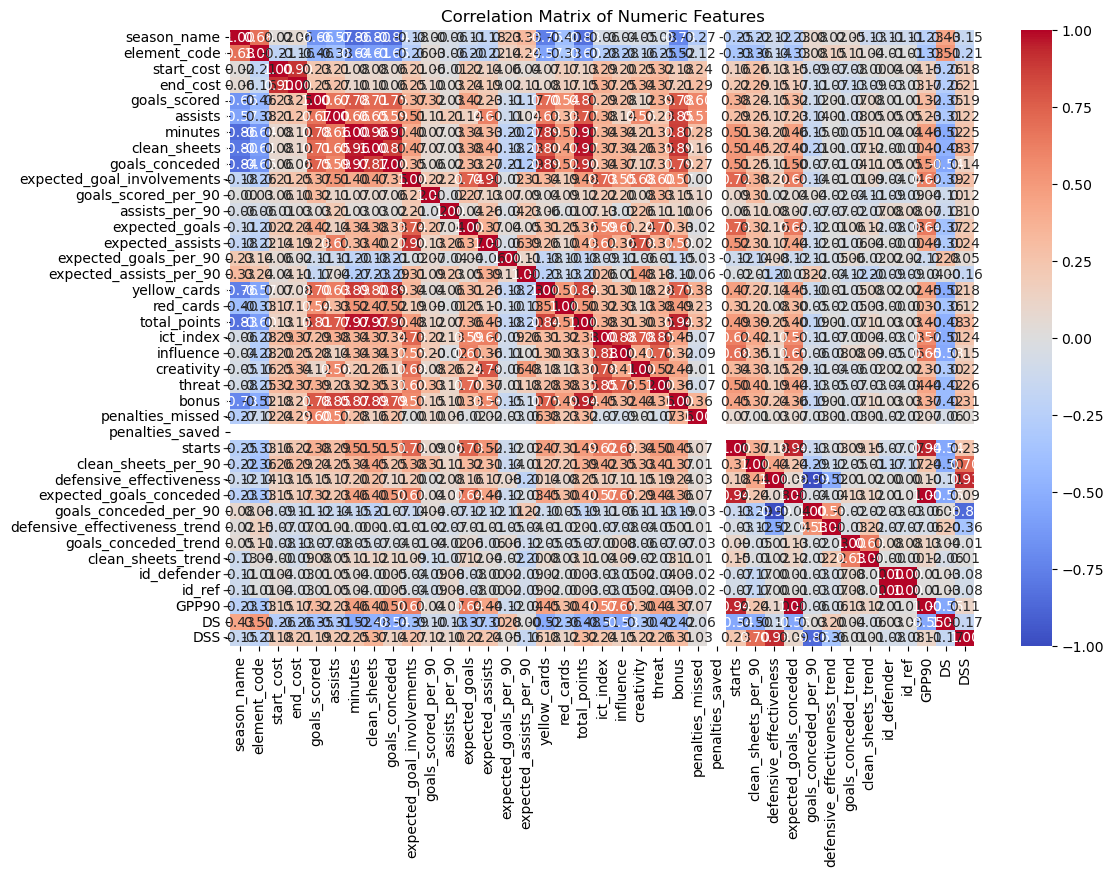

In [1866]:
# Drop object data types (non-numeric columns)
numeric_df = stopping_style_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set a threshold for high correlation (absolute correlation above 0.9)
correlation_threshold = 0.9

# Create a list of features to drop based on high correlation
drop_list_stoppers = set()  # To store features we want to drop

# Iterate over the correlation matrix and find pairs of highly correlated features
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            drop_list_stoppers.add(colname)

# Display the drop list
print(f"Features that have high correlations and may be dropped: {drop_list_stoppers}")
print("-----")

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


#### High Correlation Observations:
* DSS (Defensive Stopping Score): Highly correlated with several other metrics, such as defensive effectiveness and clean sheets.  I will drop defensive effectiveness and clean sheets in an attempt to use DSS as a predictive target for this style of player
* Goals Conceded per 90 and Expected Goals Conceded: These are closely tied to each other and also to the clean sheets and defensive effectiveness metrics. I will remove expected_goals_conceded.
* Bonus and Total Points: These are fantasy league metrics and are often tied together. Since they're highly correlated, I will drop bonus and retain total_points.
* Goals Conceded and Clean Sheets: It may be redundant to keep both and so will drop.
* ID Reference (id_ref): The referee identifier is not typically necessary for player performance.
* GPP90 (Goals Prevented per 90): It can be dropped since it's a summary of two metrics.

In [1867]:
# Drop the specified columns
stopping_style_df.drop(columns=['clean_sheets', 'goals_conceded', 'expected_goals_conceded', 'bonus', 'id_ref', 'GPP90'], inplace=True)

# Verify the changes
stopping_style_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   second_name_defender           167 non-null    object 
 1   season_name                    167 non-null    int64  
 2   element_code                   167 non-null    int64  
 3   start_cost                     167 non-null    int64  
 4   end_cost                       167 non-null    int64  
 5   goals_scored                   167 non-null    int64  
 6   assists                        167 non-null    int64  
 7   minutes                        167 non-null    int64  
 8   expected_goal_involvements     167 non-null    float64
 9   goals_scored_per_90            167 non-null    float64
 10  assists_per_90                 167 non-null    float64
 11  expected_goals                 167 non-null    float64
 12  expected_assists               167 non-null    flo

### Visuals

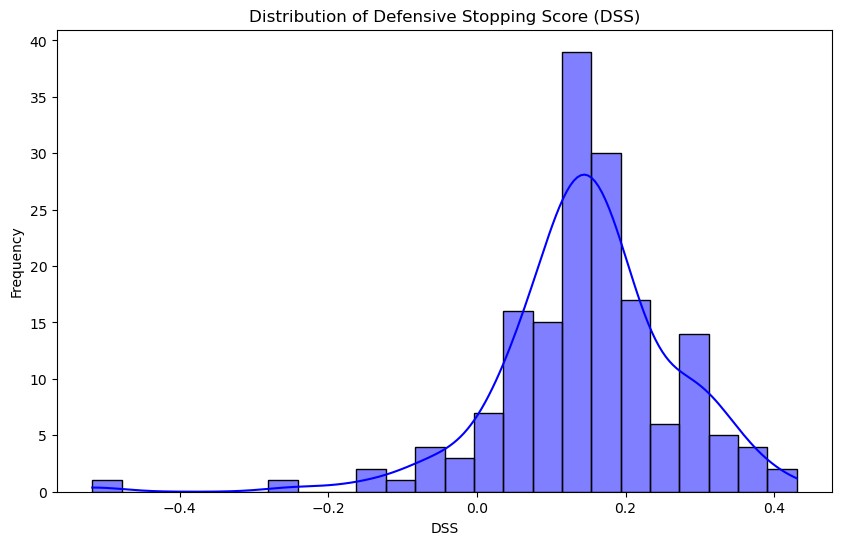

In [1868]:
# Distribution of Defensive Stopping Score (DSS)
plt.figure(figsize=(10, 6))
sns.histplot(stopping_style_df['DSS'], kde=True, color='blue')
plt.title('Distribution of Defensive Stopping Score (DSS)')
plt.xlabel('DSS')
plt.ylabel('Frequency')
plt.show()


#### Oberservations
Most defenders tend to cluster around average performance in defensive stopping, while a smaller number of players perform either extremely well or poorly.

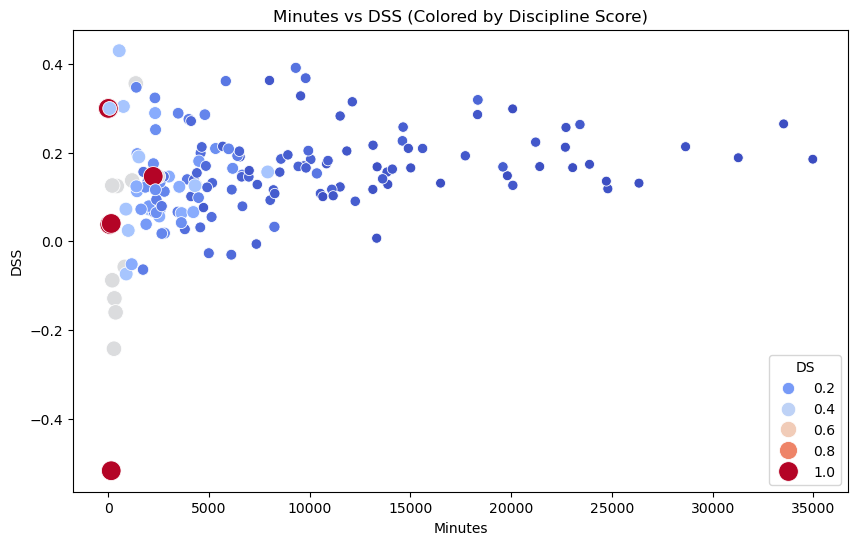

In [1869]:
# Minutes vs DSS (Colored by Discipline Score)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='minutes', 
    y='DSS', 
    hue='DS', 
    palette='coolwarm', 
    data=stopping_style_df, 
    size='DS', sizes=(50, 200)
)
plt.title('Minutes vs DSS (Colored by Discipline Score)')
plt.xlabel('Minutes')
plt.ylabel('DSS')
plt.show()


#### Observations
Interestingly, many players with a low DSS also have high DS (shown in red), meaning they are disciplined but not very effective defensively. These players have played fewer minutes, indicating that discipline alone may not correlate strongly with DSS.

/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_988/334378478.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='yellow_cards', y='DSS', data=stopping_style_df, palette='Blues')


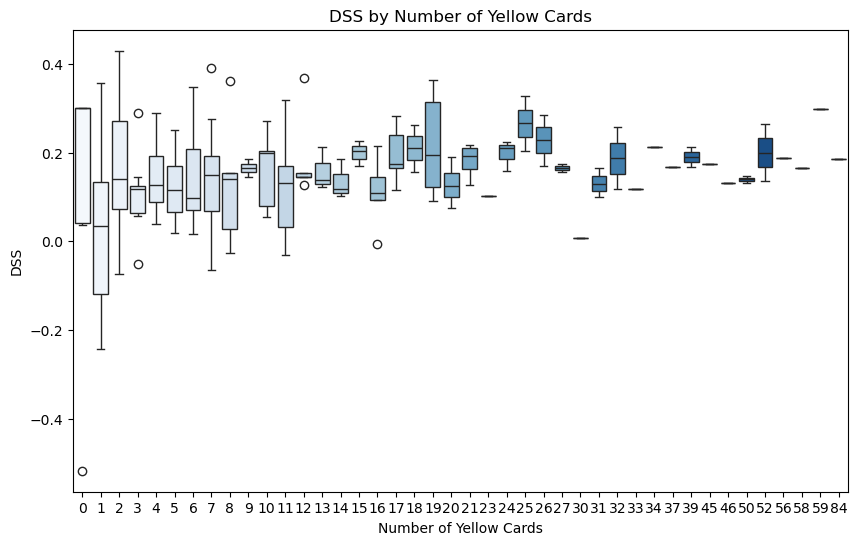

/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_988/334378478.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='red_cards', y='DSS', data=stopping_style_df, palette='Reds')


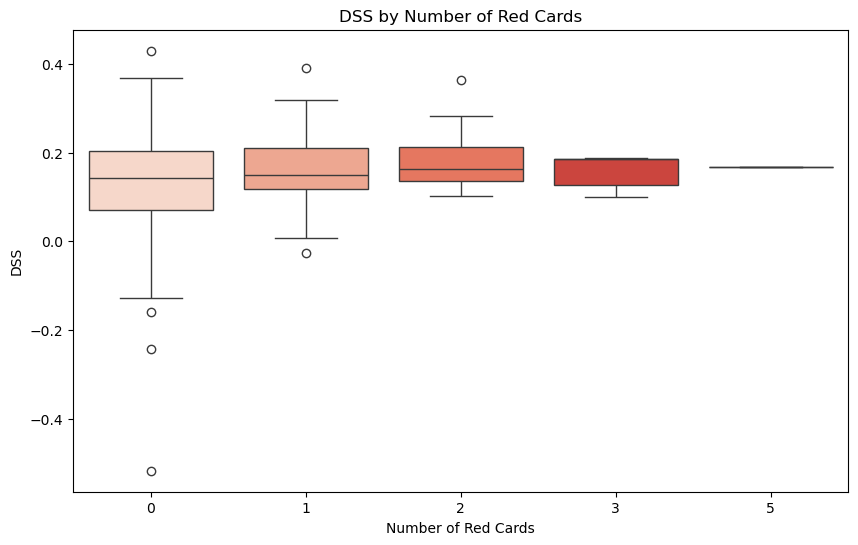

In [1870]:
# Boxplot of DSS by Red and Yellow Cards
plt.figure(figsize=(10, 6))
sns.boxplot(x='yellow_cards', y='DSS', data=stopping_style_df, palette='Blues')
plt.title('DSS by Number of Yellow Cards')
plt.xlabel('Number of Yellow Cards')
plt.ylabel('DSS')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='red_cards', y='DSS', data=stopping_style_df, palette='Reds')
plt.title('DSS by Number of Red Cards')
plt.xlabel('Number of Red Cards')
plt.ylabel('DSS')
plt.show()



#### Observations
It seems that yellow cards have a more noticeable negative correlation with DSS than red cards.

/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_988/3416508535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DSS', y='second_name_defender', data=top_10_dss, palette='Blues_d')


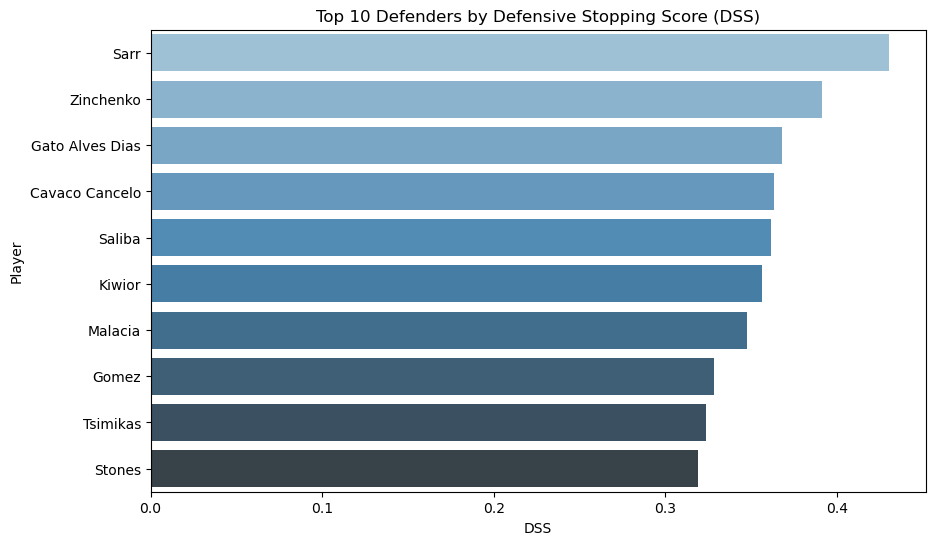

In [1871]:
# Top 10 Defenders by Defensive Stopping Score (DSS)
top_10_dss = stopping_style_df.nlargest(10, 'DSS')
plt.figure(figsize=(10, 6))
sns.barplot(x='DSS', y='second_name_defender', data=top_10_dss, palette='Blues_d')
plt.title('Top 10 Defenders by Defensive Stopping Score (DSS)')
plt.xlabel('DSS')
plt.ylabel('Player')
plt.show()

In [1872]:
# Save the dataframes as csv files

# Define the base Path
base_directory = Path('../data/processed').resolve()

# Ensure the directory exists, and create it if it doesn't
base_directory.mkdir(parents=True, exist_ok=True)

# Define the file paths using absolute paths
attack_style_filepath = base_directory / 'attack_style_players.csv'
stopping_style_filepath = base_directory / 'stopping_style_players.csv'

# Print the resolved paths to verify
print(f"Saving Attack Style DataFrame to: {attack_style_filepath}")
print(f"Saving Stopping Style DataFrame to: {stopping_style_filepath}")

# Save dataframes to CSV
attack_style_df.to_csv(attack_style_filepath, index=False)
stopping_style_df.to_csv(stopping_style_filepath, index=False)

print("Dataframes saved successfully to the correct folder!")


Saving Attack Style DataFrame to: /Users/davidkaplan/Documents/NU_Projects/Project_2/_defense_analysis/data/processed/attack_style_players.csv
Saving Stopping Style DataFrame to: /Users/davidkaplan/Documents/NU_Projects/Project_2/_defense_analysis/data/processed/stopping_style_players.csv
Dataframes saved successfully to the correct folder!
